In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importing the data
df=pd.read_csv("Facebook_Marketplace_data.csv")
print(df.info())
#checking for NaN values
print(df.isnull().sum())
#checking for duplicate values
print(df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [ ]:
#Since columns 1,2,3,4 are completely blank, we can drop them
df.drop(['Column1','Column2','Column3','Column4'],axis=1,inplace=True)


In [ ]:
#counting the number of different types of posts in the dataset
print(df['status_type'].value_counts())

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


In [ ]:
#calculating the average value of num_reactions, num_shares and num_comments for each status post type
num_reaction_count=df.groupby(['status_type'])['num_reactions'].mean()
print(num_reaction_count)
num_comments_count=df.groupby(['status_type'])['num_comments'].mean()
print(num_comments_count)
num_shares_count=df.groupby(['status_type'])['num_shares'].mean()
print(num_shares_count)

status_type
link      370.142857
photo     181.290345
status    438.783562
video     283.409597
Name: num_reactions, dtype: float64
status_type
link        5.698413
photo      15.993470
status     36.238356
video     642.478149
Name: num_comments, dtype: float64
status_type
link        4.396825
photo       2.553871
status      2.558904
video     115.679949
Name: num_shares, dtype: float64


In [ ]:
#Seeing how time of upload affects num_reactions
affect=df.groupby(['status_published'])['num_reactions'].sum()
print(affect)

status_published
1/1/2018 1:39      296
1/1/2018 23:41      89
1/1/2018 8:57      342
1/10/2013 1:07       6
1/10/2013 20:49     58
                  ... 
9/9/2016 19:03      60
9/9/2017 10:05     553
9/9/2017 22:43     284
9/9/2017 2:55      331
9/9/2017 7:13      459
Name: num_reactions, Length: 6913, dtype: int64


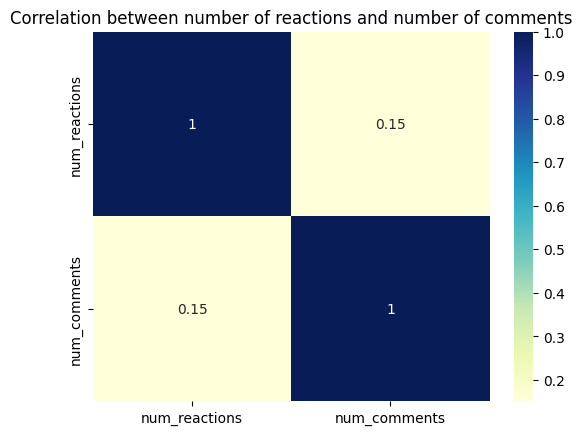

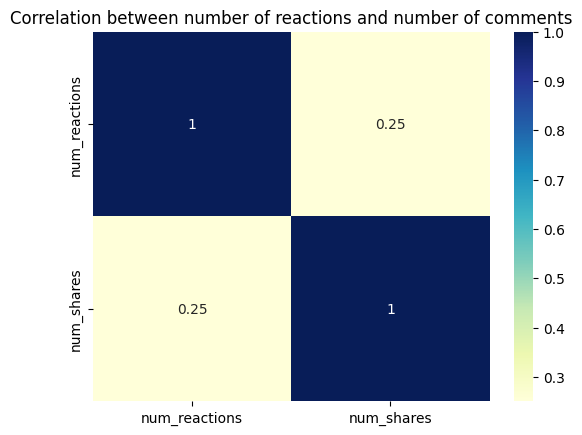

In [ ]:
#correlation between the number of reactions (num_reactions) and other engagement metrics such as comments (num_comments) and shares (num_shares)
d1=df[['num_reactions','num_comments']]
d2=df[['num_reactions','num_shares']]
cr1=d1.corr()
cr2=d2.corr()
sns.heatmap(cr1,cmap='YlGnBu',annot=True)
plt.title("Correlation between number of reactions and number of comments")
plt.show()
sns.heatmap(cr2,cmap='YlGnBu',annot=True)
plt.title("Correlation between number of reactions and number of comments")
plt.show()


In [77]:
print(df)

      status_id status_type status_published  num_reactions  num_comments  \
0             1       video   4/22/2018 6:00            529           512   
1             2       photo  4/21/2018 22:45            150             0   
2             3       video   4/21/2018 6:17            227           236   
3             4       photo   4/21/2018 2:29            111             0   
4             5       photo   4/18/2018 3:22            213             0   
...         ...         ...              ...            ...           ...   
7045       7046       photo   9/24/2016 2:58             89             0   
7046       7047       photo  9/23/2016 11:19             16             0   
7047       7048       photo  9/21/2016 23:03              2             0   
7048       7049       photo   9/20/2016 0:43            351            12   
7049       7050       photo  9/10/2016 10:30             17             0   

      num_shares  num_likes  num_loves  num_wows  num_hahas  num_sads  \
0 

In [78]:
#data preprocessing
X=df.iloc[:,[1,3,4,5,6,7,8,9,10,11]].values
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
CT=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')
X=np.array(CT.fit_transform(X))
print(X)


[['video' 529 512 ... 1 1 0]
 ['photo' 150 0 ... 0 0 0]
 ['video' 227 236 ... 1 0 0]
 ...
 ['photo' 2 0 ... 0 0 0]
 ['photo' 351 12 ... 0 0 0]
 ['photo' 17 0 ... 0 0 0]]
[[0.0 0.0 0.0 ... 1 1 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 0.0 0.0 ... 1 0 0]
 ...
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]
 [0.0 1.0 0.0 ... 0 0 0]]


Text(0.5, 1.0, 'Elbow method')

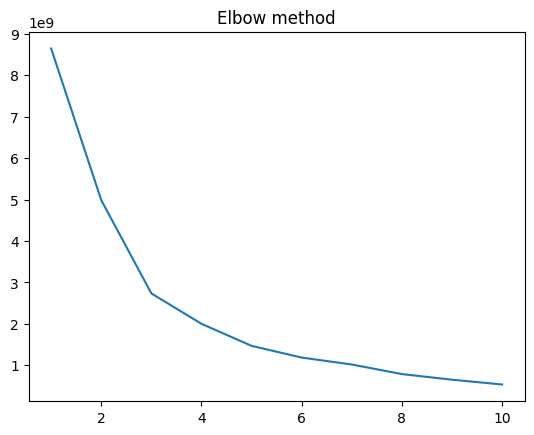

In [83]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
  k=KMeans(n_clusters=i,init="k-means++",random_state=42)
  k.fit(X)
  wcss.append(k.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow method')
plt.show()

In [85]:
#sharp decent is noticed at i=5, so number of clusters are 5
k=KMeans(n_clusters=5,init='k-means++',random_state=42)
Y=k.fit_predict(X)

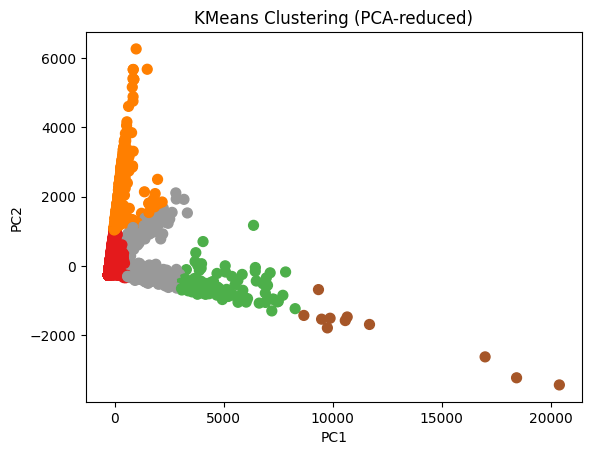

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=Y, cmap='Set1', s=50)
plt.title('KMeans Clustering (PCA-reduced)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
